# Testeo de estratégia

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
start = '1993-02-01'
end = '2007-12-31'

sp=yf.download('SPY',start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
retornos = np.log(sp / sp.shift()).dropna()

In [4]:
retornos

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-02,0.005670,0.002821,0.003547,0.002116,0.002117,-0.870031
1993-02-03,0.004231,0.010508,0.005650,0.010515,0.010515,0.966948
1993-02-04,0.012588,0.005559,0.002110,0.004175,0.004175,0.003959
1993-02-05,0.000000,-0.000693,0.005606,-0.000695,-0.000694,-0.077021
1993-02-08,0.000000,0.001386,0.004184,0.000000,0.000000,0.191726
...,...,...,...,...,...,...
2007-12-21,0.003603,0.010566,0.013070,0.009019,0.014313,-0.385587
2007-12-24,0.009791,0.007116,0.009406,0.007398,0.007398,-1.164246
2007-12-26,-0.001143,0.001337,0.000135,0.002142,0.002142,0.386143


In [5]:
estrategias = pd.DataFrame(retornos['Adj Close'])

In [6]:
estrategias

,Adj Close
Date,
1993-02-02,0.002117
1993-02-03,0.010515
1993-02-04,0.004175
1993-02-05,-0.000694
1993-02-08,0.000000
...,...
2007-12-21,0.014313
2007-12-24,0.007398
2007-12-26,0.002142


In [7]:
estrategias.columns = ['SPY']

In [8]:
estrategias

,SPY
Date,
1993-02-02,0.002117
1993-02-03,0.010515
1993-02-04,0.004175
1993-02-05,-0.000694
1993-02-08,0.000000
...,...
2007-12-21,0.014313
2007-12-24,0.007398
2007-12-26,0.002142


In [9]:
estrategias['mes'] = (estrategias.index.month)

In [10]:
estrategias

,SPY,mes
Date,,
1993-02-02,0.002117,2
1993-02-03,0.010515,2
1993-02-04,0.004175,2
1993-02-05,-0.000694,2
1993-02-08,0.000000,2
...,...,...
2007-12-21,0.014313,12
2007-12-24,0.007398,12
2007-12-26,0.002142,12


In [11]:
estrategias['dentro'] = np.where((estrategias.mes <5) | (estrategias.mes >10),1,0)

In [12]:

estrategias['est_act'] = estrategias.SPY * estrategias.dentro

In [13]:
estrategias.tail(70)

,SPY,mes,dentro,est_act
Date,,,,
2007-09-20,-0.007067,9,0,-0.000000
2007-09-21,0.002695,9,0,0.000000
2007-09-24,-0.001844,9,0,-0.000000
2007-09-25,-0.001979,9,0,-0.000000
2007-09-26,0.005270,9,0,0.000000
...,...,...,...,...
2007-12-21,0.014313,12,1,0.014313
2007-12-24,0.007398,12,1,0.007398
2007-12-26,0.002142,12,1,0.002142


In [14]:
estrategias.drop(['mes','dentro'],axis=1,inplace=True)

<AxesSubplot:xlabel='Date'>

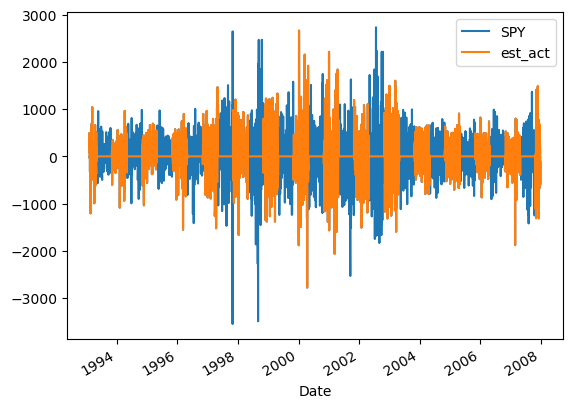

In [15]:
(estrategias / estrategias.iloc[0] * 100).plot()

In [16]:
estrategias.sum()

SPY        1.463328
est_act    0.974347
dtype: float64

In [17]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [18]:
#model = sm.OLS(estrategias.est_act, sm.add_constant(estrategias.SPY),missing='drop')
model = sm.OLS(estrategias.SPY, sm.add_constant(estrategias.est_act),missing='drop')

In [19]:
type(model)

statsmodels.regression.linear_model.OLS

In [20]:
result = model.fit()

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     3193.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:43:13   Log-Likelihood:                 12885.
No. Observations:                3756   AIC:                        -2.577e+04
Df Residuals:                    3754   BIC:                        -2.575e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.019      0.3

In [22]:
estrategias.std()

SPY        0.010656
est_act    0.007229
dtype: float64

In [23]:

estrategias.est_act[estrategias.est_act != 0].std()

0.010425310984803036

estrategias.SPY

In [24]:
rs_SPY=estrategias.SPY.mean() / estrategias.SPY.std()
rs_SPY

0.03655966950791912

In [25]:
rs_est_act=estrategias.est_act.mean() / estrategias.est_act.std()
rs_est_act

0.035884221234398356